In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

c:\Users\seboc\OneDrive\Escritorio\PROJECTS\DATASCIENCE\BOOK-RECOMENDER\book-recommender\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\seboc\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_books = pd.read_csv(f"{path}/books.csv")
df_books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [9]:
# Display basic information about the dataset
print("Dataset Info:")
df_books.info()
print("----------------------------------------")
print("----------------------------------------")
# Check for missing values
print("Missing Values:")
print(df_books.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6810 non-null   int64  
 1   isbn10               6810 non-null   object 
 2   title                6810 non-null   object 
 3   subtitle             2381 non-null   object 
 4   authors              6738 non-null   object 
 5   categories           6711 non-null   object 
 6   thumbnail            6481 non-null   object 
 7   description          6548 non-null   object 
 8   published_year       6804 non-null   float64
 9   average_rating       6767 non-null   float64
 10  num_pages            6767 non-null   float64
 11  ratings_count        6767 non-null   float64
 12  missing_description  6810 non-null   int32  
 13  age_of_the_book      6804 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(7)
memory usage: 718.4+ KB
-----

In [5]:
# Check for missing values this returns a boolean dataframe
df_missing_values_boolean = df_books.isna()
df_missing_values_boolean # Im printing this because I want to check the df structure


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,False,False,False,False,False,False,False,False,False,False,False,False
6806,False,False,False,True,False,False,False,True,False,False,False,False
6807,False,False,False,True,False,False,True,True,False,False,False,False
6808,False,False,False,True,False,False,False,False,False,False,False,False


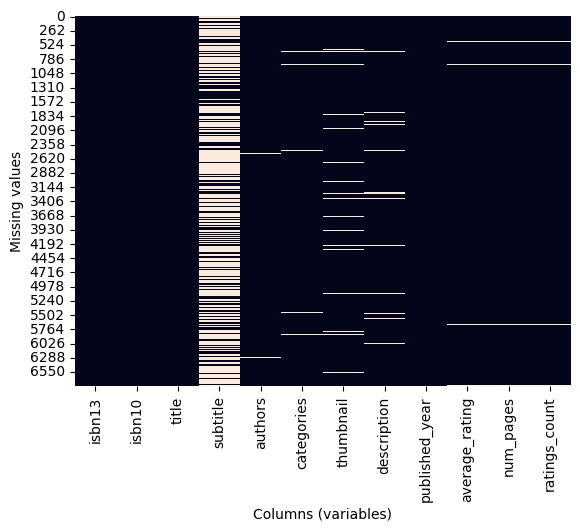

In [6]:
ax = plt.axes()
sns.heatmap(df_missing_values_boolean,cbar=False, ax=ax)

ax.set_xlabel('Columns (variables)')
ax.set_ylabel('Missing values')

plt.show()

### Finding correlation of the missing description with 'num_pages', 'age_of_the_book' and 'average_rating'

We want to analyze the correlation between missing descriptions and other variables to determine whether any of them have a strong relationship with missing descriptions. For example, if the number of pages is correlated with missing descriptions, it could indicate that either longer or shorter books are more likely to lack descriptions. Since we will be excluding books without descriptions from our dataset, this could introduce bias in our recommender system, potentially favoring either shorter or longer books. The same concern applies to factors like the book's age and its average rating.

In [10]:
# Create a numeric representation of which books are missing
df_books['missing_description'] = np.where(df_books['description'].isna(), 1, 0)

#Calculate the age of the book
df_books["age_of_the_book"] = 2025 - df_books["published_year"]

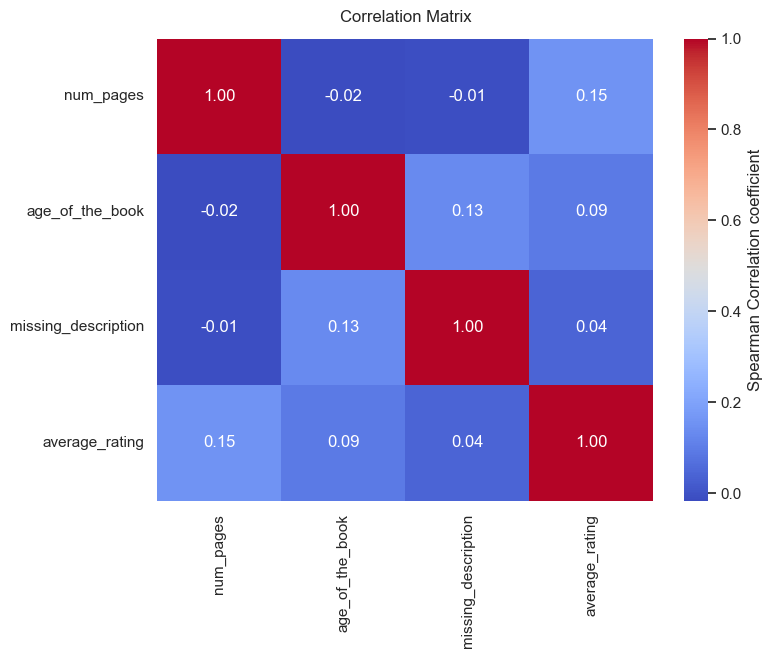

In [14]:
#Create the subset of columns that we want in our dataset
columns_of_interest = ['num_pages', 'age_of_the_book', 'missing_description', 'average_rating']

# We use the spearman method because Pearson correlations are more appropriate for when you are dealing with
# continuous variables but the missing description is a binary variable
correlation_matrix = df_books[columns_of_interest].corr(method='spearman')

# Convert the correlation matrix into a seaborn heatmap
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label':'Spearman Correlation coefficient'}) 

heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)

plt.show()


There are many missing values, and filling them would require a significant amount of effort, likely through web scraping. For this reason, we decided to remove books with missing values.

In [16]:
df_books[
        (df_books["description"].isna()) | 
        (df_books["average_rating"].isna()) | 
        (df_books["published_year"].isna()) | 
        (df_books["num_pages"].isna())
        ].shape

(303, 14)

In [17]:
df_books_with_no_missing_values = df_books[
        ~(df_books["description"].isna()) & 
        ~(df_books["average_rating"].isna()) & 
        ~(df_books["published_year"].isna()) & 
        ~(df_books["num_pages"].isna())
        ]

df_books_with_no_missing_values.shape

(6507, 14)

Lets have a closer look at the distribution of categories

In [27]:
df_books_with_no_missing_values["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


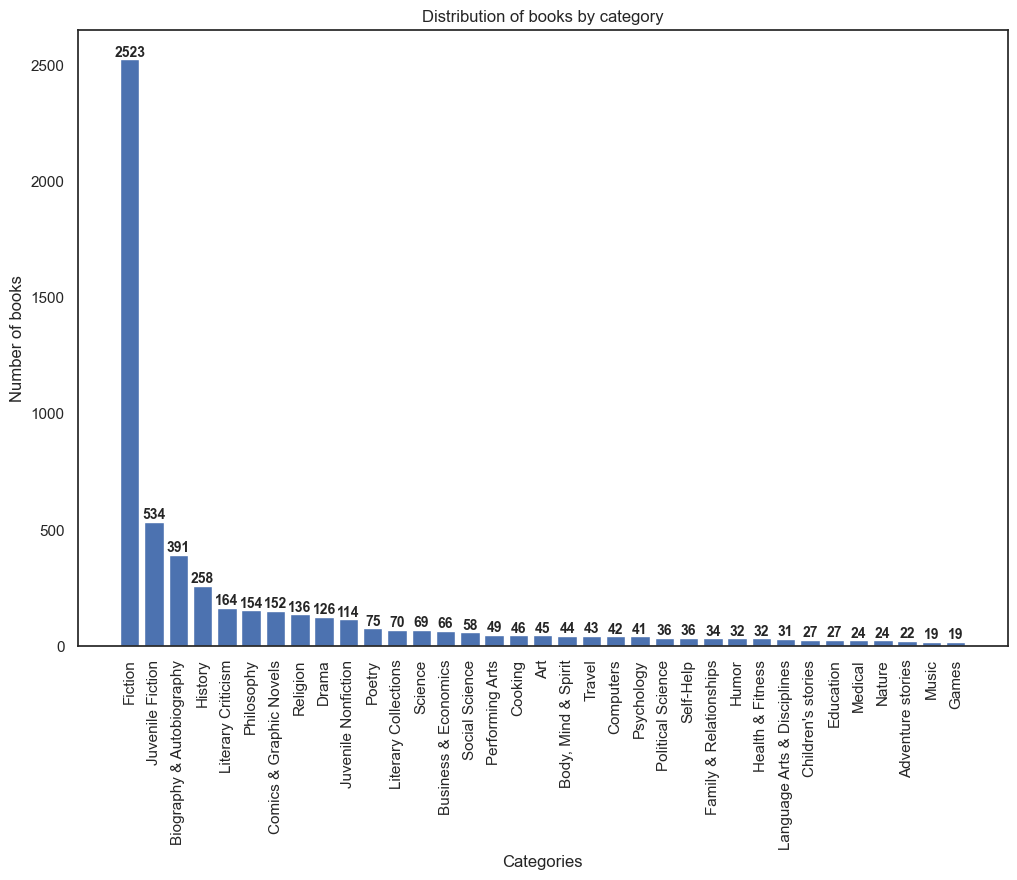

In [44]:
category_counts = df_books_with_no_missing_values["categories"].value_counts().reset_index().sort_values("count", ascending=False).head(35)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(category_counts["categories"], category_counts["count"])  

# Labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Number of books')
ax.set_title('Distribution of books by category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()  # Get height of the bar (Count value)
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.show()

Now, we want to refine the description column

In [45]:
df_books_with_no_missing_values["words_in_description"] = df_books_with_no_missing_values["description"].str.split().str.len()

C:\Users\seboc\AppData\Local\Temp\ipykernel_24056\806104065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_with_no_missing_values["words_in_description"] = df_books_with_no_missing_values["description"].str.split().str.len()


In [46]:
df_books_with_no_missing_values

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_the_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


C:\Users\seboc\AppData\Local\Temp\ipykernel_24056\753724939.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


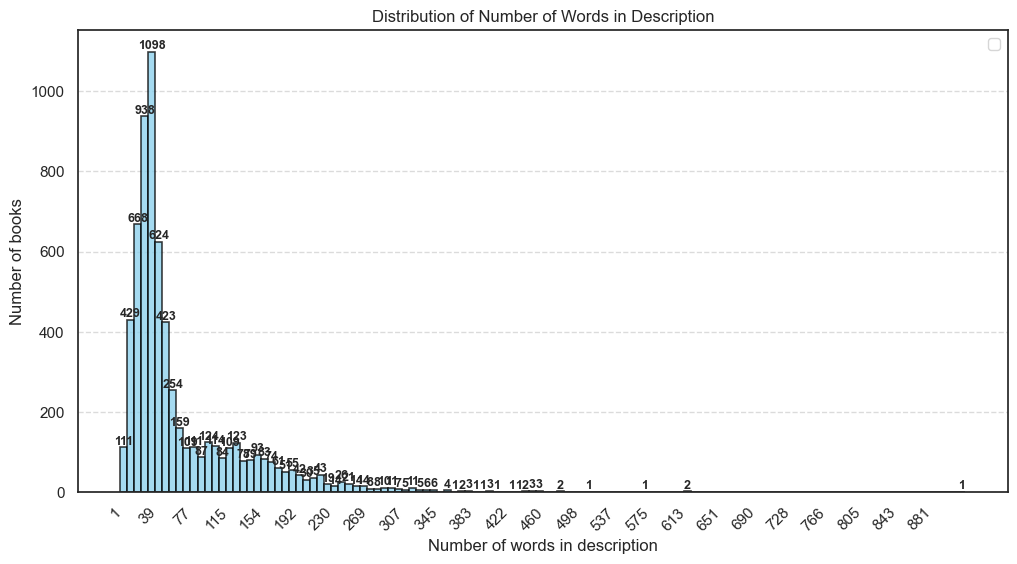

In [71]:

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram
n, bins, patches = ax.hist(
    df_books_with_no_missing_values["words_in_description"], 
    bins=120, color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.75
)

# Labels and title
ax.set_xlabel('Number of words in description')
ax.set_ylabel('Number of books')
ax.set_title('Distribution of Number of Words in Description')

# Grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for count, bin_edge in zip(n, bins[:-1]):  # bins[:-1] to match count length
    if count > 0:  # Only show labels for bars with values
        ax.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customizing x-axis labels (bin edges)
bin_centers = (bins[:-1] + bins[1:]) / 2  # Get midpoints of bins for better placement
ax.set_xticks(bin_centers[::5])  # Show every 5th bin label to avoid overcrowding
ax.set_xticklabels([f"{int(b)}" for b in bins[:-1]][::5], rotation=45, ha='right')

# Add legend
ax.legend()

# Show plot
plt.show()

In [78]:
df_books_with_no_missing_values.loc[df_books_with_no_missing_values["words_in_description"].between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [76]:
df_books_with_no_missing_values.loc[df_books_with_no_missing_values["words_in_description"].between(5,14), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [77]:
df_books_with_no_missing_values.loc[df_books_with_no_missing_values["words_in_description"].between(15,24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [79]:
df_books_with_no_missing_values.loc[df_books_with_no_missing_values["words_in_description"].between(25,34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [80]:
df_books_with_no_missing_values_25_words=df_books_with_no_missing_values[df_books_with_no_missing_values["words_in_description"]>=25]
df_books_with_no_missing_values_25_words.shape

(5197, 15)

In [83]:
df_books_with_no_missing_values_25_words['title_and_subtitle'] = (
    np.where(df_books_with_no_missing_values_25_words['subtitle'].isna(),df_books_with_no_missing_values_25_words['title'],
            df_books_with_no_missing_values_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
)

C:\Users\seboc\AppData\Local\Temp\ipykernel_24056\3586588267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_with_no_missing_values_25_words['title_and_subtitle'] = (


In [84]:
df_books_with_no_missing_values_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_the_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


Now we need to create a new description column which tags each description with a unique identifier and Im gonna explain why we need to this in the next section, it is important for building the vector database

In [85]:
df_books_with_no_missing_values_25_words["tagged_description"] = df_books_with_no_missing_values_25_words[["isbn13","description"]].astype(str).agg(": ".join, axis=1)

C:\Users\seboc\AppData\Local\Temp\ipykernel_24056\653720650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_with_no_missing_values_25_words["tagged_description"] = df_books_with_no_missing_values_25_words[["isbn13","description"]].astype(str).agg(": ".join, axis=1)


In [86]:
df_books_with_no_missing_values_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_the_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897: Lewis' work on the nature of lo...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934: ""In The Problem of Pain, C.S. L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222: On A Train Journey Home To Nort...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014: This book tells the tale of a m...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623: Wisdom to Create a Life of Pass...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535: This collection of the timeless...


In [87]:
(
    df_books_with_no_missing_values_25_words
    .drop(columns=["subtitle", "missing_description", "age_of_the_book","words_in_description"],axis=1)
    .to_csv("books_cleaned.csv", index=False)
)